## Gradient descent methods
#### 
introduction

#### 1.1 A simple quadratic function
Let's start by numerically optimize a simple two-dimensional function $ f(x) = x^2_1+x^2_2, \ x \in \R^", \ x= (x_1, x_2)^T. $ Since it's a convex function (we can notice it by the positive sign of the coefficient of x^2) it will have a single minimum, found where $ \nabla f(x) = 0$. Let's now find where the gradient is equal to zero.

$ \nabla f(x)= \Big( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}\Big)^T =(2x_{1},2x_{2})^T \\ 
\nabla f(x)=0 \\
\frac{\partial f}{\partial x_{1} = 2x_1 = 0, \ x_1 = 0 \\
\frac{\partial f}{\partial x_{2} = 2x_2 = 0, \ x_2 = 0
$ 

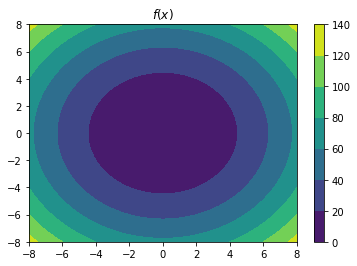

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fA(x)
x = np.linspace(-8.0, 8.0, 100)
y = np.linspace(-8.0, 8.0, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('$f(x)$')
plt.show()

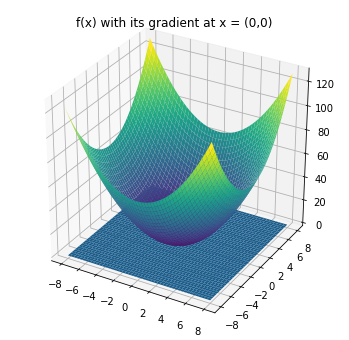

In [14]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-8,8,50)
x2=np.linspace(-8,8,50)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)
eq = 0*X+0*Y

ax.plot_surface(X, Y, eq)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')
plt.show()

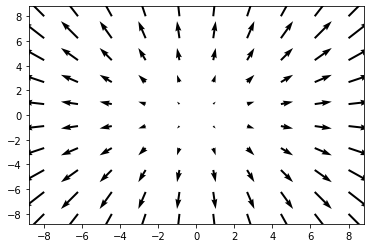

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-8,8,10),np.linspace(-8,8,10))

u = 2*x
v = 2*y

plt.quiver(x,y,u,v)
plt.show()

#### 1.2 A function with multiple minima
Let's now analyze the function $ f(x_1, x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4) + x_1x_2+x_2^2(-4+4x_2^2) $

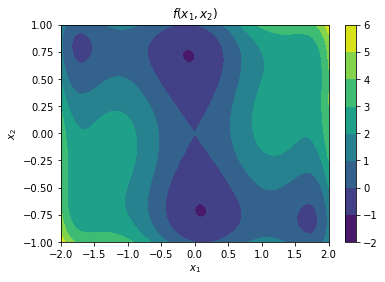

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()

# As extra, try stocastic gradient descent.

Looking at the contour plot, we can guess that the two most frequent minima that will be found are the ones in the center of the plot, although it will depend on where we start, if for example our $x^0$ will be close to the bottom-right corner or top-left one, the found minima will probably be a local one, and not the global ones. Now we will use the simple gradient descent with 100 iterations to illustrate different paths of the algorithm.

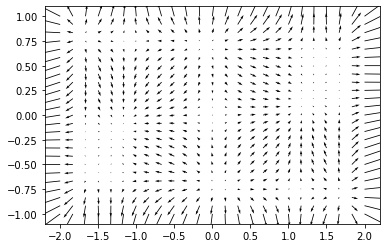

NameError: name 'points' is not defined

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-2,2,25),np.linspace(-1,1,25))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
plt.show()


In [26]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
print(x01, x02)

def grad_descent(x1, x2, alpha, iter):
    pair = np.array([x1, x2])
    points = [[x1, x2]]
    for i in range(iter):
        pair = pair - alpha*gradf(pair) 
        points.append([pair[0], pair[1]])
    return points

grad_descent(x01, x02, 0.1, 100)

-1.907750299834337 -0.9858673895605652


[[-1.907750299834337, -0.9858673895605652],
 [-1.0612892895693804, -0.05066861042665338],
 [-0.9420226879465257, 0.015133561281891292],
 [-0.743755187764572, 0.12143713356768003],
 [-0.4609735592781219, 0.29009703013371707],
 [-0.199323852202547, 0.5292104279371956],
 [-0.0993749622395617, 0.7353709661077447],
 [-0.09423449807870345, 0.6973382048328151],
 [-0.0892821589907573, 0.7220689847991197],
 [-0.09066001963795049, 0.7062924840187967],
 [-0.08938595876809104, 0.7166591117471701],
 [-0.09014187319965668, 0.7100028814794965],
 [-0.08964273295336904, 0.7143548016964548],
 [-0.08996796541068132, 0.7115433273159126],
 [-0.089758453276702, 0.7133747042121947],
 [-0.08989543862865264, 0.7121881346822577],
 [-0.08980695523025638, 0.7129596665233495],
 [-0.08986461734594575, 0.7124591550857542],
 [-0.08982726757761429, 0.7127843390282396],
 [-0.08985155867628386, 0.7125732723422525],
 [-0.08983580270709488, 0.71271035634165],
 [-0.08984604044516821, 0.7126213595209872],
 [-0.0898393958783

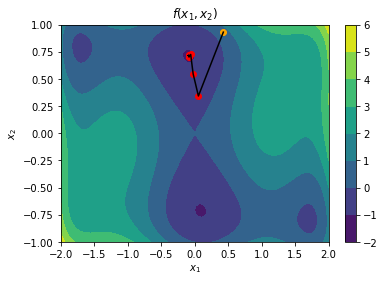

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
points = grad_descent(x01, x02, 0.1, 100)
lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

# As extra, try stocastic gradient descent.

## 2 Newton descent method


#### 2.1 
The function that we are going to study now is $ f(X) = 100x_1^2 +x_2^2 $ for $ x \in \R^2, x = (x_1, x_2)^T $. We can notice that this function is convex since the coefficients of $ x_1**2, x_2**2 $ are positive, therefore we will only have one minimum.


